In [1]:
import pandas as pd 
import os 

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import MarkerCluster

## business

In [24]:
business_columns = ['business_id','name','state','latitude','longitude','stars', 'review_count', 'is_open']
business = pd.read_csv('../../data/yelp/business.csv.gz',usecols=business_columns,compression='gzip')
business.drop_duplicates(inplace=True)

In [25]:
business.columns


Index(['business_id', 'name', 'state', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open'],
      dtype='object')

In [26]:
business.head(3)

,business_id,name,state,latitude,longitude,stars,review_count,is_open
0,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,AZ,36.269593,-87.058943,2.0,6,1
1,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,MO,36.208102,-86.768170,1.5,10,1
2,knQ4vIgx-r85kjlWVVjcpQ,Silver and Blue Outfitters,PA,39.476518,-119.784037,4.5,5,1


## User

**nota**
- Nos damos cuenta que la columna review_count, es el número de reseñas que se realizo a cualquier negocio, no necesariamente a negocios de comida rapida.
- A continuación eliminaremos los duplicados para poder realizar las graficas de los datos.

In [84]:
users_columns = ['user_id', 'name', 'review_count']
users = pd.read_csv('../../data/yelp/users.csv.gz',usecols=users_columns,compression='gzip')
users.drop_duplicates(inplace=True)

In [40]:
users

,user_id,name,review_count
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333
2,SgiBkhXeqIKl1PlFpZOycQ,Eugene,682
3,QF1Kuhs8iwLWANNZxebTow,Catherine,607
4,1L3O2CUTk27SnmqyPBWQdQ,Helen,38
...,...,...,...
177604,DH-aSZOpX0jn3eVpCVokng,Ronny,65
177605,RPyGU7Q0Sqklh-9B3eTd-w,James,51
177606,4Xcfod0D5l_gHVH_4SK3gA,Mark,53
177607,rnkZtJ0crVvODXJp0Z-MAQ,Shantel,60


## Reviews

In [49]:
reviews_columns = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'date']
reviews = pd.read_csv('../../data/yelp/reviews.csv.gz',usecols=reviews_columns,compression='gzip')
reviews.drop_duplicates(inplace=True)

In [51]:
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,date
0,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,2017-01-02 03:17:34
1,PDHRlnEdkEcwATry4w71PQ,UsBxLh14sUpO8SdeqIiGOA,Wy8Hswf2cLQGRZN6armkag,1,1,0,0,2011-08-24 23:07:08
2,onlgwy5qGDEzddsrnIvtWg,pYXeL0RCqus2IfhthYCOyA,W7NxQw8UYFR0HLPrI08tvw,4,0,0,0,2012-02-01 14:21:25
3,9IG9eB3K-RdIonPBuZ0psw,t2IL-HIXQKd6iZ6cIY8kcg,jOOOrH5n2ijnsZKxzPSAiw,5,0,0,0,2016-04-23 15:13:10
4,LO2C_mywzQy5BvdEeONR1A,jvURGq9nyZkTF1KuSaZC_g,CYwC5OjwCN6ib_AQDxi3Ow,5,0,0,0,2016-08-12 21:30:55
...,...,...,...,...,...,...,...,...
233003,ZgMFhqwQze4gLJJqUevgqg,eE5cGP32rTKr8IiBLSYevw,aK6R2akvIK9ijw3FvDy8vw,1,0,0,0,2018-04-07 02:15:25
233004,1ShPBvmfhhFIqMUI_NZi9A,34vtVo9AoCUr_w6CEcQ_Bg,QnHd7ZdlpLDl5BqEFeiIBg,5,1,0,0,2021-09-15 00:15:48
233005,ZumvJCSs0l6XixIzSK-V0w,L0RgciChknpMBXu78nRW1g,lw6OXWUzcwtTzbdh4b0a6g,5,0,0,0,2012-03-15 02:27:44
233006,MVg4YUQeEhCA7Z7RsBJSVg,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3,1,0,0,2013-07-25 21:00:15


## merge data

In [91]:
data = reviews.merge(business,on='business_id').merge(users,on='user_id')

nombres = {'stars_x': 'stars_business','stars_y':'stars_users',
 'review_count_x':'review_count_business',
 'review_count_y':'review_count_users',
 'name_x':'name_business','name_y':'name_users'}

data.rename(columns=nombres,inplace=True)

## Graficas

In [93]:
data.columns

Index(['review_id', 'user_id', 'business_id', 'stars_business', 'useful',
       'funny', 'cool', 'date', 'name_business', 'state', 'latitude',
       'longitude', 'stars_users', 'review_count_business', 'is_open',
       'name_users', 'review_count_users'],
      dtype='object')

In [117]:
data.head(1)

,review_id,user_id,business_id,stars_business,useful,funny,cool,date,name_business,state,latitude,longitude,stars_users,review_count_business,is_open,name_users,review_count_users
0,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,2017-01-02 03:17:34,The Original Habit Burger Grill,PA,34.43557,-119.824706,4.0,329,1,Heidi,922


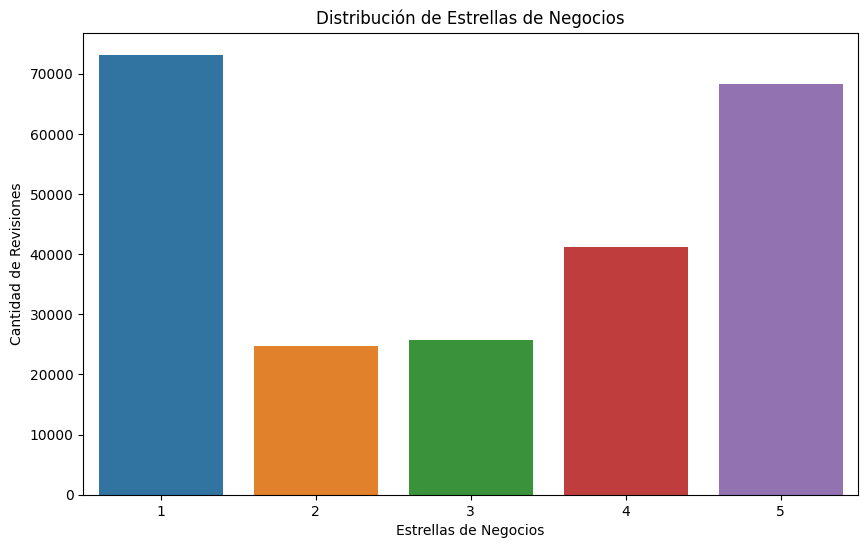

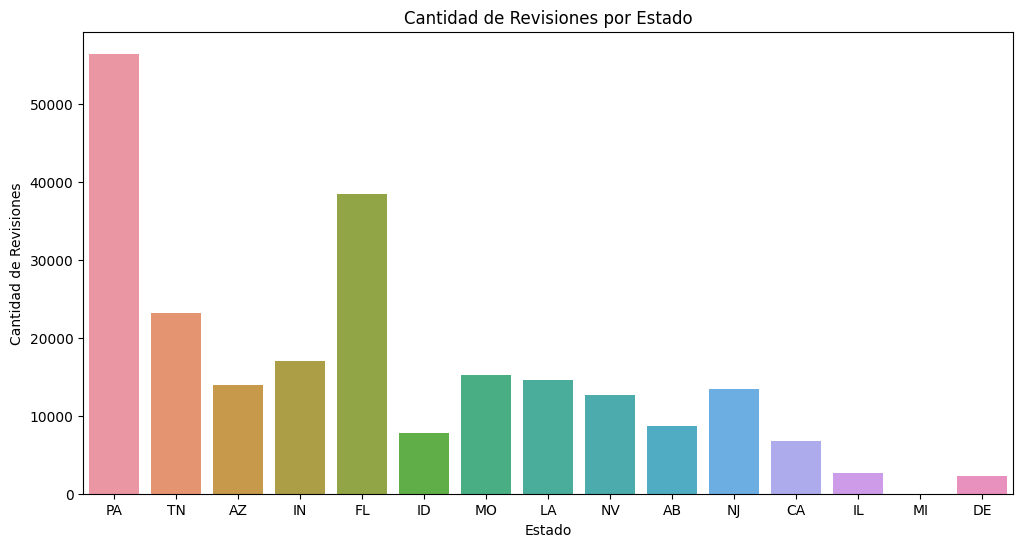

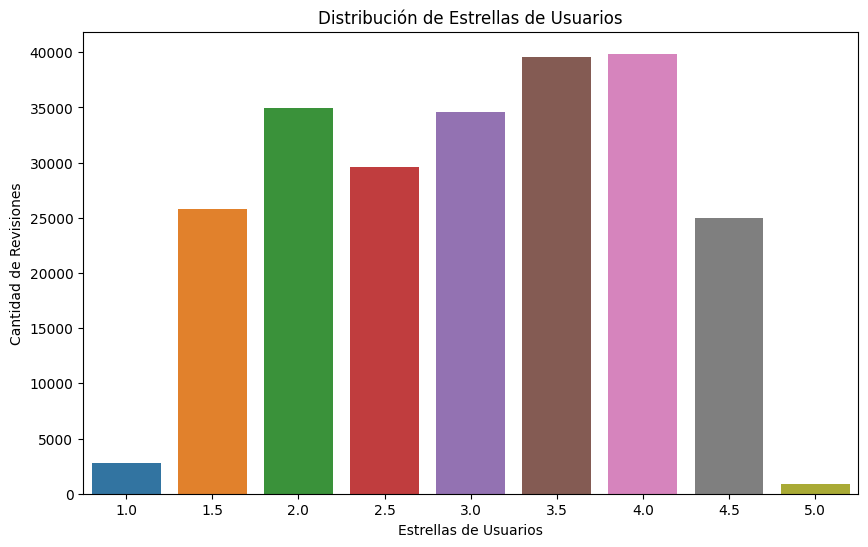

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que 'data' es tu DataFrame

# Gráfico de barras para la distribución de estrellas de negocios
plt.figure(figsize=(10, 6))
sns.countplot(x='stars_business', data=data)
plt.title('Distribución de Estrellas de Negocios')
plt.xlabel('Estrellas de Negocios')
plt.ylabel('Cantidad de Revisiones')
plt.show()

# Gráfico de barras para contar la cantidad de revisiones por estado
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=data)
plt.title('Cantidad de Revisiones por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Revisiones')
plt.show()

# Gráfico de barras para la distribución de estrellas de usuarios
plt.figure(figsize=(10, 6))
sns.countplot(x='stars_users', data=data)
plt.title('Distribución de Estrellas de Usuarios')
plt.xlabel('Estrellas de Usuarios')
plt.ylabel('Cantidad de Revisiones')
plt.show()


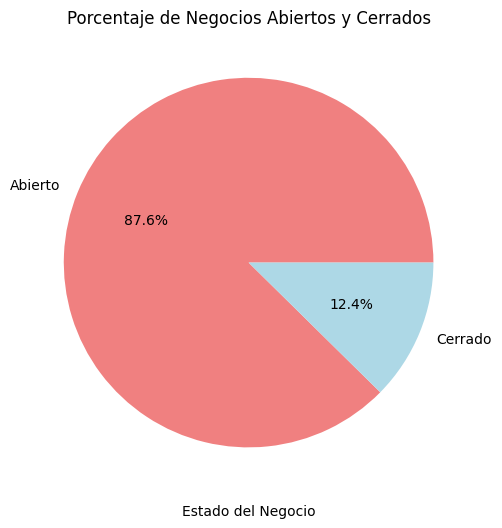

In [111]:

# Gráfico de pie para la cantidad de negocios abiertos y cerrados
plt.figure(figsize=(8, 6))

# Obtener la cantidad de negocios abiertos y cerrados
count_open_closed = data['is_open'].value_counts()

# Etiquetas personalizadas
labels = ['Abierto' ,'Cerrado']

# Crear el gráfico de pie con etiquetas personalizadas
count_open_closed.plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], labels=labels)
plt.title('Porcentaje de Negocios Abiertos y Cerrados')
plt.xlabel('Estado del Negocio')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()


In [120]:
data[['business_id','user_id']].groupby('business_id').count()

,user_id
business_id,
--lqIzK-ZVTtgwiQM63XgQ,16
-0m4IwD1FIOqkA8dh4mVfQ,39
-1iLbEf1NwY-OJp5Hg-3Sg,13
-1owBLC2h6DF5n_j77oq3g,7
-1q9ktAQXpgFSNrst7tzag,43
...,...
zvB14002Qi0qZ_DH_DfpLg,123
zvlJoRJfViu-_dZflUn6Bw,13
zw7yspkw0kygt-dauP3_4g,5


Top 10 Businesses with Most Reviews:
                     name_business  review_count
0          Reading Terminal Market          5778
1          Reading Terminal Market          5778
2          Reading Terminal Market          5778
3          Reading Terminal Market          5778
4          Reading Terminal Market          5778
...                            ...           ...
16853  Campo's Philly Cheesesteaks           697
16854  Campo's Philly Cheesesteaks           697
16855  Campo's Philly Cheesesteaks           697
16856  Campo's Philly Cheesesteaks           697
16857  Campo's Philly Cheesesteaks           697

[16858 rows x 2 columns]


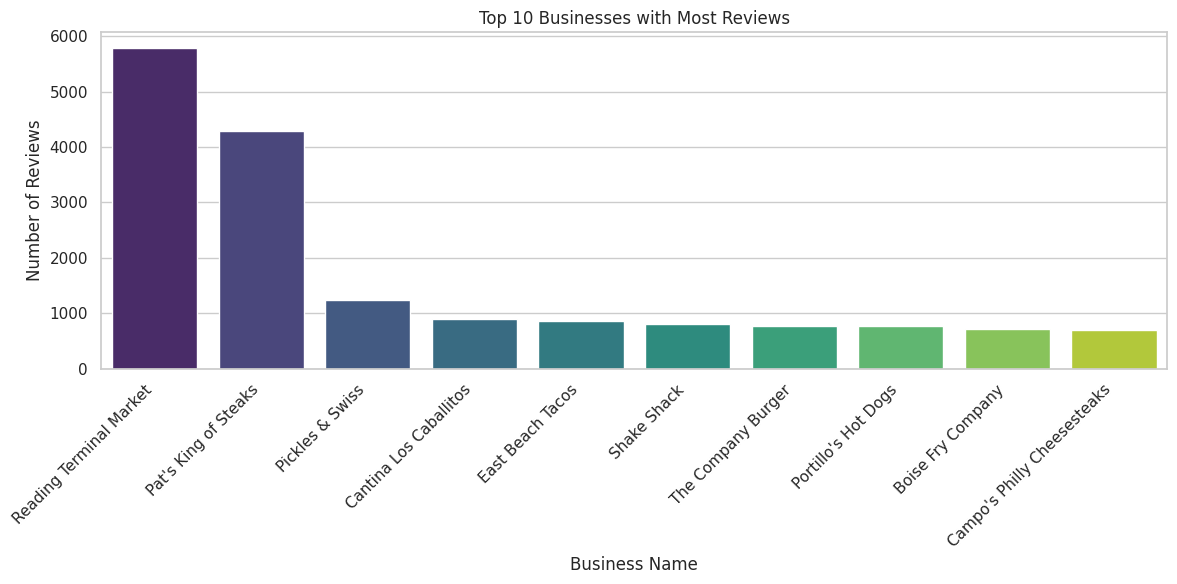

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable 'data'
# If your dataset is in a CSV file, you can load it using: df = pd.read_csv('your_dataset.csv')

# Group by business_id and count the number of reviews for each business
business_reviews = data.groupby('business_id')['review_id'].count().reset_index(name='review_count')

top_businesses = business_reviews.sort_values(by='review_count', ascending=False).head(10)

# Merge with the original dataset to get the business names
top_businesses = pd.merge(top_businesses, data[['business_id', 'name_business']], on='business_id', how='left')

# Print the top 10 businesses with names
print("Top 10 Businesses with Most Reviews:")
print(top_businesses[['name_business', 'review_count']])

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar graph using Seaborn
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='name_business', y='review_count', data=top_businesses, palette="viridis")
bar_plot.set(xlabel='Business Name', ylabel='Number of Reviews', title='Top 10 Businesses with Most Reviews')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## users

Top 5 Users with Most Reviews:
                      user_id  review_count
87522  _BcWyKQL16ndpBdggh2kNA           111
92894  bYENop4BuQepBjM1-BI3fA           107
74959  Um5bfs5DH6eizgjH3xZsvg            97
59727  OQaneFUkS1rJJvqfUzjb6g            95
94517  cFaHx-FkCnzdfF8BccukIg            92


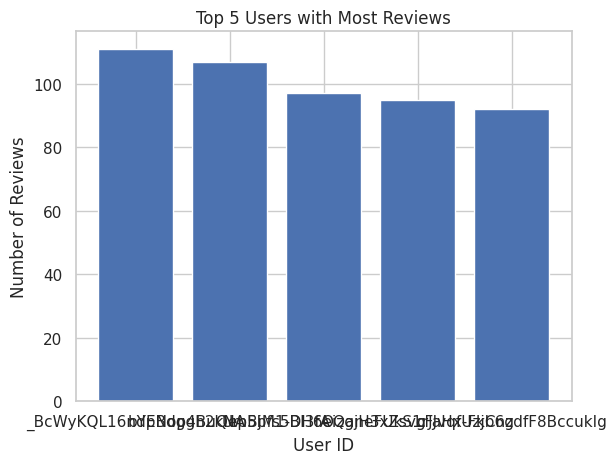

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable 'data'
# If your dataset is in a CSV file, you can load it using: data = pd.read_csv('your_dataset.csv')

# Group by user_id and count the number of reviews for each user
user_reviews = data.groupby('user_id')['review_id'].count().reset_index(name='review_count')

# Sort users in descending order based on the number of reviews
top_users = user_reviews.sort_values(by='review_count', ascending=False).head(5)

# Print the top 5 users
print("Top 5 Users with Most Reviews:")
print(top_users[['user_id', 'review_count']])

# Create a bar graph to visualize the results
plt.bar(top_users['user_id'], top_users['review_count'])
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.title('Top 5 Users with Most Reviews')
plt.show()

Top 10 userses with Most Reviews:
    name_users  review_count
0        Karen           111
1        Karen           111
2        Karen           111
3        Karen           111
4        Karen           111
..         ...           ...
896     Gerald            74
897     Gerald            74
898     Gerald            74
899     Gerald            74
900     Gerald            74

[901 rows x 2 columns]


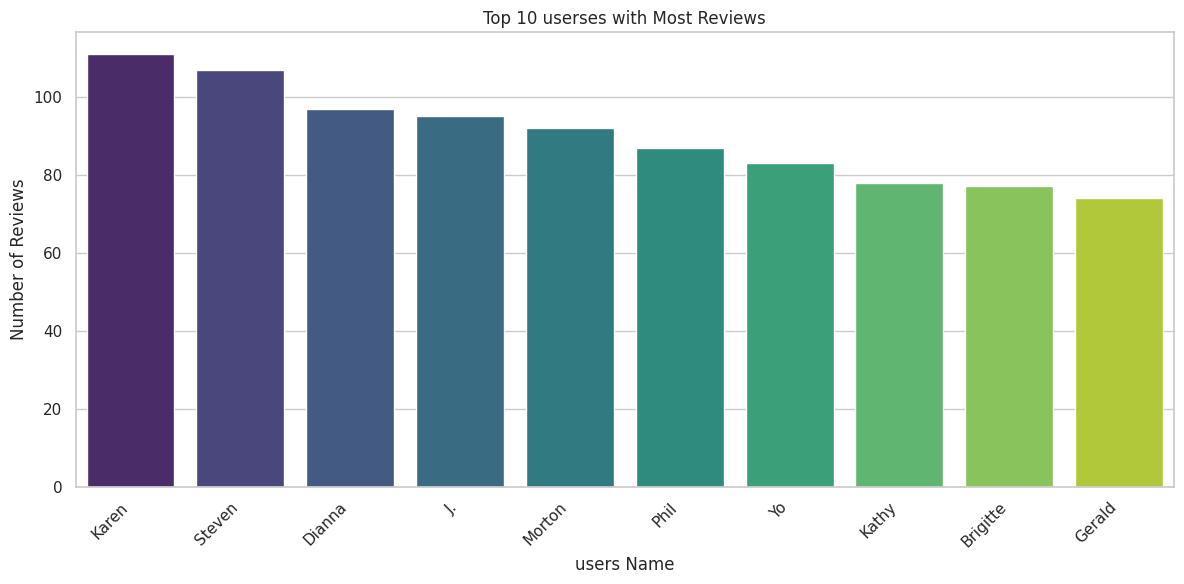

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable 'data'
# If your dataset is in a CSV file, you can load it using: df = pd.read_csv('your_dataset.csv')

# Group by user_id and count the number of reviews for each users
users_reviews = data.groupby('user_id')['review_id'].count().reset_index(name='review_count')

top_userses = users_reviews.sort_values(by='review_count', ascending=False).head(10)

# Merge with the original dataset to get the users names
top_userses = pd.merge(top_userses, data[['user_id', 'name_users']], on='user_id', how='left')

# Print the top 10 userses with names
print("Top 10 userses with Most Reviews:")
print(top_userses[['name_users', 'review_count']])

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar graph using Seaborn
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='name_users', y='review_count', data=top_userses, palette="viridis")
bar_plot.set(xlabel='users Name', ylabel='Number of Reviews', title='Top 10 userses with Most Reviews')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Top 5 Businesses with Most Positive Reviews:
                 name_business  positive_review_count
0      Reading Terminal Market                   5380
1      Reading Terminal Market                   5380
2      Reading Terminal Market                   5380
3      Reading Terminal Market                   5380
4      Reading Terminal Market                   5380
...                        ...                    ...
12955       The Company Burger                    576
12956       The Company Burger                    576
12957       The Company Burger                    576
12958       The Company Burger                    576
12959       The Company Burger                    576

[12960 rows x 2 columns]

Top 5 Businesses with Most Negative Reviews:
             name_business  negative_review_count
0     Pat's King of Steaks                   1266
1     Pat's King of Steaks                   1266
2     Pat's King of Steaks                   1266
3     Pat's King of Steaks         

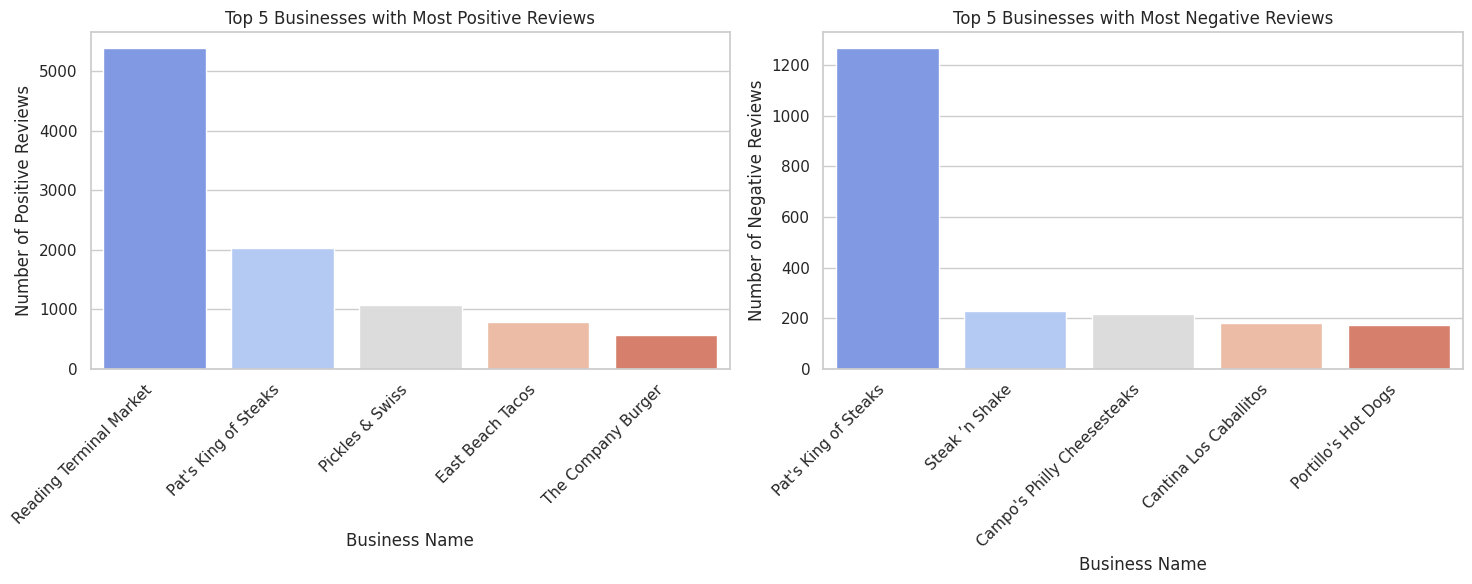

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable 'data'
# If your dataset is in a CSV file, you can load it using: data = pd.read_csv('your_dataset.csv')

# Filter reviews with positive ratings (4 or 5 stars)
positive_reviews = data[data['stars_business'] >= 4]

# Group by business_id and count the number of positive reviews for each business
top_positive_businesses = positive_reviews.groupby('business_id')['review_id'].count().reset_index(name='positive_review_count')

# Sort businesses in descending order based on the number of positive reviews
top_positive_businesses = top_positive_businesses.sort_values(by='positive_review_count', ascending=False).head(5)

# Merge with the original dataset to get the business names
top_positive_businesses = pd.merge(top_positive_businesses, data[['business_id', 'name_business']], on='business_id', how='left')

# Print the top 5 businesses with most positive reviews
print("Top 5 Businesses with Most Positive Reviews:")
print(top_positive_businesses[['name_business', 'positive_review_count']])

# Filter reviews with negative ratings (1 or 2 stars)
negative_reviews = data[data['stars_business'] <= 2]

# Group by business_id and count the number of negative reviews for each business
top_negative_businesses = negative_reviews.groupby('business_id')['review_id'].count().reset_index(name='negative_review_count')

# Sort businesses in descending order based on the number of negative reviews
top_negative_businesses = top_negative_businesses.sort_values(by='negative_review_count', ascending=False).head(6)

# Merge with the original dataset to get the business names
top_negative_businesses = pd.merge(top_negative_businesses, data[['business_id', 'name_business']], on='business_id', how='left')

# Print the top 5 businesses with most negative reviews
print("\nTop 5 Businesses with Most Negative Reviews:")
print(top_negative_businesses[['name_business', 'negative_review_count']])

# Set Seaborn style
sns.set(style="whitegrid")

# Create side-by-side bar plots using Seaborn
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
bar_plot_pos = sns.barplot(x='name_business', y='positive_review_count', data=top_positive_businesses, palette="coolwarm")
bar_plot_pos.set(xlabel='Business Name', ylabel='Number of Positive Reviews', title='Top 5 Businesses with Most Positive Reviews')
bar_plot_pos.set_xticklabels(bar_plot_pos.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1, 2, 2)
bar_plot_neg = sns.barplot(x='name_business', y='negative_review_count', data=top_negative_businesses, palette="coolwarm")
bar_plot_neg.set(xlabel='Business Name', ylabel='Number of Negative Reviews', title='Top 5 Businesses with Most Negative Reviews')
bar_plot_neg.set_xticklabels(bar_plot_neg.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()